# 8 章 : データの可視化（Matplotlib, Seaborn を用いたグラフ作成）
----

## 8.1 解析環境のセットアップおよびデータの準備
### 8.1.1 可視化ライブラリ

- Matplotlib
  - プロット領域や座標軸等に対する細かい調整が容易にできる
  - 高度なグラフも描ける
- Seaborn
  - Matplotlib を補完する位置付け
  - 複雑なグラフを書くときに Matplotlib よりも簡単にコーディングできる

### 8.1.2 ライブラリのインストール

In [86]:
# Matplotlib と Seaborn のインストール
!pip3 install matplotlib
!pip3 install seaborn

# Anaconda を使っている場合はこちら
# !conda install matplotlib
# !conda install seaborn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


複数のヒストグラムを縦に並べて描いたり、ベン図を書いたりするのは、Matplotlib や Seaborn だけでは困難なので、JoyPy および matplotlib_venn ライブラリを使用する。

In [87]:
# JoyPy と matplotlib_venn のインストール
!pip3 install joypy
!pip3 install matplotlib_venn

# Anaconda を使っている場合はこちら
# !conda install joypy
# !conda install matplotlib_venn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


# 8.1.3 データセットの準備
本章の流れ
1. 擬似データを使用してグラフ作成関数の基本的な使い方を説明
2. 第 7 章で定量した遺伝子発現量行列を用いて、可視化の応用例を示す  
なお、発現量の低い遺伝子は、解析結果の偽陽性を増やす原因になるため、解析前に除去する必要がある。

In [88]:
# 8-1 : データの読み込みと発現量の低い遺伝子の除去
import numpy as np
import pandas as pd

tpm = pd.read_table('count_tpm.tsv', index_col=0)
tpm = tpm.loc[tpm.mean(axis=1) > 1.0, :]  # 平均発現量が 1.0TPM より大きいもののみ取り出す
tpm.head()  # データの確認

,batch_1,batch_2,batch_3,chemostat_1,chemostat_2,chemostat_3
gene_id,,,,,,
gene_0005,0.948490,2.799529,4.969954,4.689762,4.372026,8.657291
gene_0009,1.456789,1.242913,1.574382,3.226353,3.777192,3.878222
gene_0010,8.547801,7.956960,8.130975,159.953635,159.681219,147.903784
gene_0011,17.146568,12.227012,13.439088,147.000089,166.232609,154.750798
gene_0012,181.630900,204.342810,218.854452,257.885864,215.595828,206.211542


RNA-Seq データの定量で得られるリードカウントデータ、およびそれを正規化した TPM のばらつきは大きい  
→ わかりやすく可視化するためにデータの対数化

In [89]:
# 8-2 : データの対数化
log_tpm = np.log10(tpm + 1.0)  # 真数が 0 になるのを防ぐために、1.0 を足しておく
log_tpm.head()

,batch_1,batch_2,batch_3,chemostat_1,chemostat_2,chemostat_3
gene_id,,,,,,
gene_0005,0.289698,0.579730,0.775971,0.755094,0.730138,0.984855
gene_0009,0.390368,0.350812,0.410673,0.625966,0.679173,0.688262
gene_0010,0.979903,0.952161,0.960517,2.206701,2.205965,2.172906
gene_0011,1.258794,1.121462,1.159540,2.170262,2.223321,2.192430
gene_0012,2.261574,2.312480,2.342135,2.413108,2.335650,2.316414


## 8.2 Matplotlib ライブラリの使い方
### 8.2.1 グラフのプロット領域

Matplotlib はグラフのプロット領域をいくつかのパーツに分けて、それぞれのパーツをクラスとして定義してある。
- Figure クラス : プロット領域全体を含む
- Axes クラス : 実際にグラフを描くサブプロット領域を含む

Figure クラスに対して、複数の Axis クラスのインスタンスを生成することで、1枚の画像に複数のグラフを描ける

<img src="matplotlib.jpeg" width=600>

### 8.2.2 グラフの作成方法
object-oriented インターフェースでグラフを書く手順
1. `matplotlib.pyplot.figure()` 関数で Figure クラスのインスタンスを呼び出す
2. Figure クラスの `add_subplot()` メソッドで Axes クラスのインスタンスを作成する
3. Axes クラスで定義されたサブプロット領域に、Axes クラスで定義された `scatter()` や `hist()` などの作図メソッドを使用してグラフを描く
4. 必要に応じて座標軸などのラベルをつける
5. Figure クラスの `show()` メソッドを使用してグラフを表示する

<ipython-input-90-da31cb89a713>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()  # ディスプレイに表示


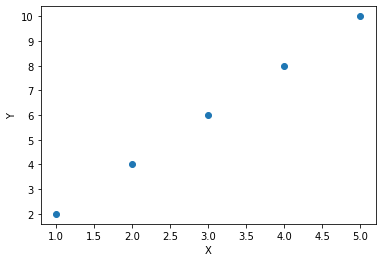

In [90]:
# 8-3 : object-oriented インターフェースでのグラフの描画
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

fig = plt.figure()  # プロット領域を準備
ax = fig.add_subplot()  # グラフを描くためのサブプロット領域を用意
ax.scatter(x, y)  # 散布図を描く
# 軸ラベルを設定
ax.set_xlabel('X')
ax.set_ylabel('Y')
fig.show()  # ディスプレイに表示

state-based インターフェース
- MATLAB の使い方を踏襲した
- pyplot が現在操作中の Figure クラスや Axes クラスを自動的に識別して操作し、グラフを作成

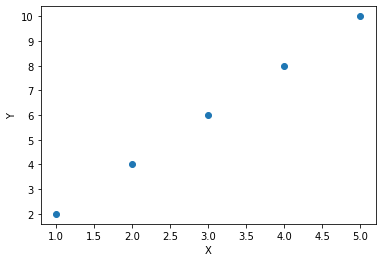

In [91]:
# 8-4 : state-based インターフェースでのグラフの描画
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

plt.scatter(x, y)  # 自動的にプロット領域とサブプロット領域を用意したうえで散布図を描く

# 現在のサブプロット領域のグラフに対して軸ラベルを設定する
plt.xlabel('X')
plt.ylabel('Y')

plt.show()  # ディスプレイに表示

### 8.2.3 グラフの保存方法
`savefig()` メソッドに拡張子付きのファイル名を与えると、Figure クラスのインスタンス上で描かれたグラフが画像ファイルとして保存される
- PNG, PDF, SVG, TIFF などほとんどのフォーマットに対応している

画像のサイズは `plt.figure()` メソッドの引数 `figsize` を介して指定する
- `figsize=(width, height)`
- サイズの単位はインチ

解像度は引数 `dpi` を介して指定する

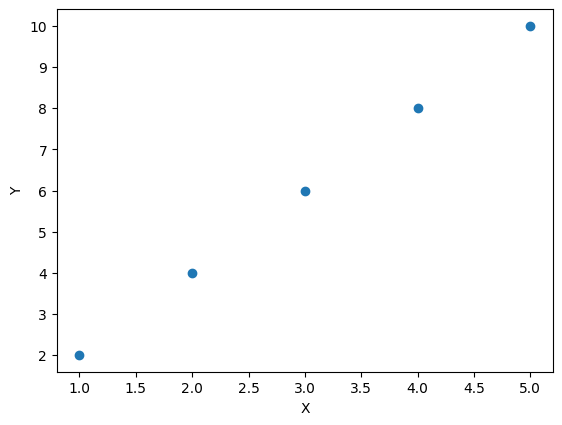

In [92]:
# 8-5 : グラフを横 6.4 インチ、縦 4.8 インチ、解像度 100dpi の画像として PDF で書き出す
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

fig = plt.figure(figsize=(6.4, 4.8), dpi=100)
ax = fig.add_subplot()
ax.scatter(x, y)
ax.set_xlabel('X')
ax.set_ylabel('Y')
fig.savefig('example_scatterplot.pdf')

state-based インターフェースを使用している場合、`plt.savefig()` メソッドでグラフを画像として保存できる。

### 8.2.4 基本グラフを描くメソッド
これらのメソッドは、x 座標および y 座標の配列（リストや pandas の Series でも可）を引数として受け取る  
その他に色、マーカーや線の形などを指定する引数も多数用意されている

<img src="8-2-4.jpeg" width=600>

### 8.2.5 座標軸や凡例を調整するメソッド
座標軸の表示範囲を設定したり、座標の目盛り位置を指定したり、座標軸のスケールを変更したりするためによく使われるメソッド

<img src="8-2-5.jpeg" width=600>

## 8.3 基本グラフ
この節では、ヒストグラム、ボックスプロット、散布図、線グラフ、棒グラフなどの基本的なグラフの作図方法を説明する。

### 8.3.1 ヒストグラム

- 量的データの分布の様子を可視化するために用いられる
- 度数分布表に基づいて描かれる
- 階級の範囲はいくつかの方法に基づいて決められる
  - 平方根選択
  - スタージェスの公式
    - データ数が n の時、log2(n+1) 以上の最小の整数を階級の幅とする
  - スコットの選択
    - データの標準偏差の 3.5 倍をデータ数の 3 乗根で割ったものを階級の幅とする

<ipython-input-93-0ed50b600b36>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


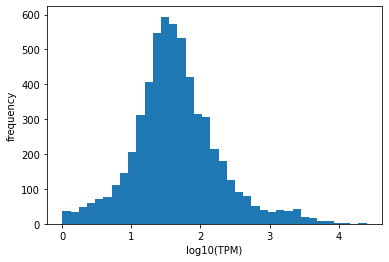

In [93]:
# 8-6 : Matplotlib でヒストグラムを描画
x = log_tpm.iloc[:, 1]
fig = plt.figure()
ax = fig.add_subplot()
ax.hist(x, bins='scott')
ax.set_xlabel('log10(TPM)')
ax.set_ylabel('frequency')
fig.show()

`hist()` メソッドの引数 `bins` に `sqrt`, `sturges`, `scott` などの文字列を代入して階級の範囲の選択法を指定できる  
`bins=10` のように、任意の整数値を代入することにより階級の範囲を決めることも可能

`hist()` メソッドの `density` 引数に `True` を代入することで、正規化されたヒストグラムが描かれる
- 正規化されたヒストグラムは全体の面積が 1.0 となる
- 各ビンの高さの合計が 1.0 になるわけではない

ビンの高さの合計を 1.0 にするためには、`weight` 引数を利用して、入力データの値に重みをかけて調整する必要がある
- この時、`bins` は整数で指定しなければならない
- スコットの選択などの公式で階級の範囲を決めたい場合には、あらかじめ計算しておく必要がある

<ipython-input-94-117feca56da0>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


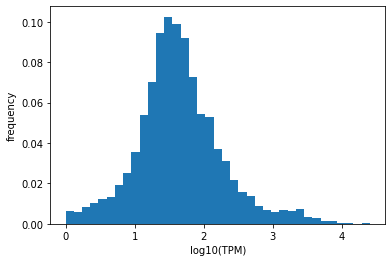

In [94]:
# 8-7 : 正規化されたヒストグラムの描画
x = log_tpm.iloc[:, 1]

# スコットの選択に基づくビン数の計算
h = (3.5 * np.std(x)) / (len(x) ** (1/3))
n_bins = int(np.round((np.max(x) - np.min(x)) / h))

# 生データにかける重みの計算
# ones_like() は引数と同じ形状で全ての要素が 1 の配列を返す
w = np.ones_like(x) / float(len(x))

fig = plt.figure()
ax = fig.add_subplot()
ax.hist(x, bins=n_bins, weights=w)
ax.set_xlabel('log10(TPM)')
ax.set_ylabel('frequency')
fig.show()

同じ Axes クラスのインスタンスに対して `hist()` メソッドを複数実行することで、同じ作図領域に複数のヒストグラムを描くことができる
- ヒストグラムを重ねて描画する
- 重なって見えなくなるのを防ぐために、`hist()` メソッドの `alpha` 引数に透明度を指定することができる

<ipython-input-95-b0e113a6917d>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


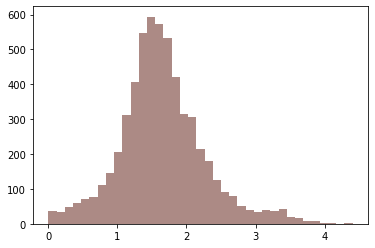

In [95]:
# 8-8 : 発現量行列に含まれる 6 ライブラリの TPM の分布を 1 つのサブプロット領域に描く
fig = plt.figure()
ax = fig.add_subplot()

for i in range(tpm.shape[1]):
    x = log_tpm.iloc[:, 1]
    ax.hist(x, bins='scott', alpha=0.2)
    
fig.show()

各々のヒストグラムを上下にずらして描く方法
- JoyPy ライブラリを用いる
- 上の例では、`log_tpm` を JoyPy ライブラリの `joyplot()` 関数に代入
  - デフォルトのままではデータの分布から密度が推定され、それが描かれる
  - ヒストグラムを描く際には `hist` 引数に `True` を指定
  - `joyplot()` 関数でも `bins` や `alpha` 引数が利用できる

<ipython-input-96-f01499d04d01>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


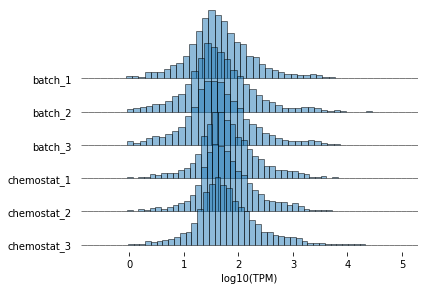

In [96]:
# 8-9 : ヒストグラムを上下にずらして描画
import joypy

fig, axes = joypy.joyplot(log_tpm, hist=True, bins='scott', alpha=0.5)
axes[-1].set_xlabel('log10(TPM)')
fig.show()

### 8.3.2 ボックスプロット（箱ひげ図）

- 量的データの分布をわかりやすく表現するために使われるグラフ
- 複数の変量を同時に比べる際に便利
- ボックスプロットは四分位点に基づいて描かれる
  - 箱の下辺 : 第一四分位数 ($Q_{\frac{1}{4}}$)
  - 箱の上辺 : 第三四分位数 ($Q_{\frac{3}{4}}$)
  - 箱の内部の線 : 第二四分位数 ($Q_{\frac{2}{4}}$)
  - ひげの下端 : $Q_{\frac{1}{4}} - 1.5IQR$
  - ひげの上端 : $Q_{\frac{3}{4}} + 1.5IQR$
    - IQR : 四分位範囲 ($Q_{\frac{3}{4}} - Q_{\frac{1}{4}}$)
- ひげの上下端を超えたデータは外れ値として扱われる
- Matplotlib では `boxplot()` 関数を用いて描く
  - 第一引数には描きたい変量
  - そのデータのラベルをリストとして `label` 引数に代入

<ipython-input-97-f1120a6f31f0>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


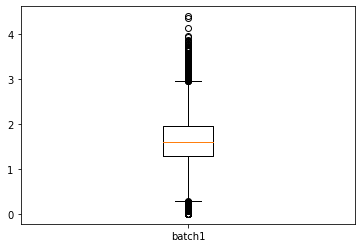

In [97]:
# 8-10 : ボックスプロットの描画
x = log_tpm.iloc[:, 1].values

fig = plt.figure()
ax = fig.add_subplot()
ax.boxplot(x, labels=['batch1'])
fig.show()

`boxplot()` に行列（NumPy の二次元配列もしくは pandas の DataFrame） を代入すると、各列に対してボックスプロットが生成される
- $x$ 軸のラベルも同様にリストあるいは配列として与える

<ipython-input-98-fec42a1a58f2>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


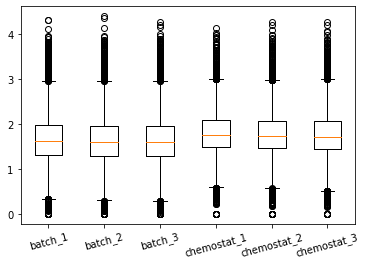

In [98]:
# 8-11 : 複数のボックスプロットの描画
x = log_tpm.values
labels = log_tpm.columns.values

fig = plt.figure()
ax = fig.add_subplot()
ax.boxplot(x, labels=labels)
ax.set_xticklabels(labels, rotation=15)  # 軸ラベルを 15 度回転させて表示
fig.show()

ボックスプロットだけでは分布の形を比較することが難しい
- ボックスプロットの上に実際の点を重ねたり、実際の分布から密度を推定して描いたりすることがある
- バイオリンプロット : 推定密度をボックスプロットのように描いたグラフ
  - Matplotlib では `violinplot()` メソッドを用いて描く
  - 座標軸を表示させるための `label` オプションがない
    - ユーザー側で `set_xticks()` や `set_xticklabels()` メソッドなどを利用してラベルを出力する必要がある

<ipython-input-99-b2df9796d181>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


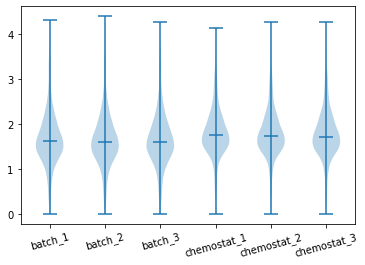

In [99]:
# 8-12 : バイオリンプロットの描画
x = log_tpm.values
labels = log_tpm.columns.values
xticks = [i + 1 for i in range(len(labels))]

fig = plt.figure()
ax = fig.add_subplot()
ax.violinplot(x, showmedians=True)

ax.set_xticks(xticks)
ax.set_xticklabels(labels, rotation=15)
fig.show()

### 8.3.3 散布図
- 2 つの量的データの関係や分布を可視化するために用いられる
- 2 つの変量の間に因果関係が想定される場合、横軸に原因となる変量を、縦軸に結果となる変量を取るのが一般的
- Axes クラスの `scatter()` メソッドに横軸と縦軸の座標を代入して描く
  - `grid()` メソッドで作図領域にグリッド線を追加するとグラフが見やすくなる

<ipython-input-100-0901331f3f58>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


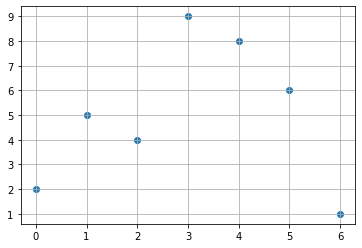

In [100]:
# 8-13 : 散布図の描画
x = [0, 1, 2, 3, 4, 5, 6]
y = [2, 5, 4, 9, 8, 6, 1]

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(x, y)
ax.grid()
fig.show()

RNA-Seq の解析において散布図は多用される
- 平均分散プロット : 全ライブラリにおける遺伝子の平均と分散を示す
- MA プロット : 発現変動遺伝子の同定結果を示す

平均分散プロットを描く手順
1. 横軸の座標となる平均 $\mu$ および縦軸の座標となる分散 $v$ を pandas の DataFrame メソッドで計算し、それぞれを変数 `mu`, `var` に代入
2. `mu`, `var` を `scatter()` メソッドに入れる

このまま可視化すると全体の把握が難しいので、縦軸と横軸を対数スケールで描く
- `ax.set_xscale`, `ax.set_yscale` に `symlog` を指定

<ipython-input-101-994c969d2a8a>:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


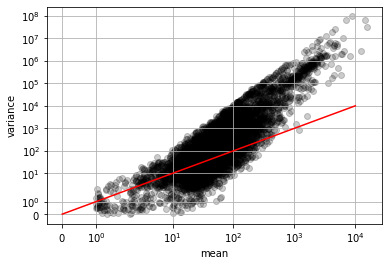

In [101]:
# 8-14 : 平均分散プロットを描く
mu = tpm.mean(axis=1).values
var = tpm.var(axis=1).values

fig = plt.figure()
ax = fig.add_subplot()
ax.grid()
ax.scatter(mu, var, color='black', alpha=0.2)
ax.plot([0, 1e4], [0, 1e4], color='red')
ax.set_xlabel('mean')
ax.set_ylabel('variance')
ax.set_xscale('symlog')
ax.set_yscale('symlog')
fig.show()

MA プロットを描く手順
1. 対数化された発現量の平均および、fold change (倍率変化) を計算
2. fold change の絶対値が 4 以上の場合を発現変動遺伝子として定義
3. `scatter()` メソッドを 2 回使用して、非発現変動遺伝子および発現変動遺伝子の点を描く
4. `scatter()` メソッドの `label` 引数に点の属性 (非発現か発現か) を追加
5. `legend()` メソッドで点の色と遺伝子の属性を対応させるグラフ凡例を出力

<ipython-input-102-14995753ecf7>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


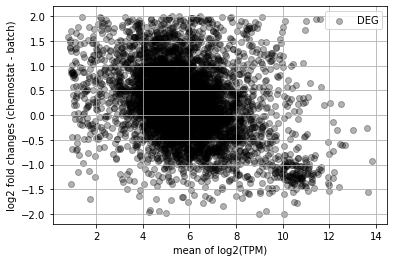

In [102]:
# 8-15 : MA プロットを描く
batch_log_tpm_mean = np.log2(tpm.iloc[:, :3].mean(axis=1).values + 1)
chemostat_log_mean = np.log2(tpm.iloc[:, 3:].mean(axis=1).values + 1)

mu = (batch_log_tpm_mean + chemostat_log_mean) / 2
fc = chemostat_log_mean - batch_log_tpm_mean

is_DEG = np.array([False] * len(fc))  # [False, False, ..., False] が fc の要素数ある array を作成
is_DEG[(np.abs(fc) > 2)] = True  # 発現量の差が対数にして 2 以上の要素をフラグ

fig = plt.figure()
ax = fig.add_subplot()
ax.grid()
ax.scatter(mu[np.logical_not(is_DEG)], fc[np.logical_not(is_DEG)], color='black', alpha=0.3, label='DEG')
ax.set_xlabel('mean of log2(TPM)')
ax.set_ylabel('log2 fold changes (chemostat - batch)')
ax.legend()
fig.show()

Seaborn の `jointplot()` 関数を用いると容易にヒストグラム付きの散布図を描くことができる

手順
1. 横軸と縦軸の座標となるデータを 1 つの DataFrame に用意する
2. この DataFrame を `jointplot()` 関数に代入し、横軸と縦軸にあたる列名を指定

/Users/sumiyuichiro/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


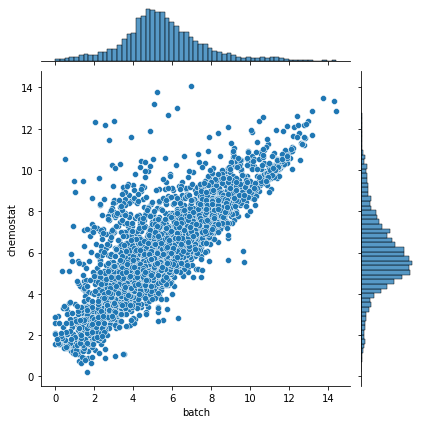

In [103]:
# 8-16 : batch サンプルの平均と chemostat サンプルの平均の関係をヒストグラム付きの散布図で描く
import seaborn as sns

batch_log_tpm_mean = np.log2(tpm.iloc[:, :3].mean(axis=1).values + 1)
chemostat_log_mean = np.log2(tpm.iloc[:, 3:].mean(axis=1).values + 1)

log_tpm_lib_mean = pd.DataFrame({'batch' : batch_log_tpm_mean, 'chemostat' : chemostat_log_mean})

sns.jointplot('batch', 'chemostat', data=log_tpm_lib_mean)
plt.show()

ペアプロット : 変数の数が多くなった際に、複数の変数間の総当たりでヒストグラム付きの散布図を描き、それを 1 枚にまとめたもの  
→ Seaborn の `pairplot()` 関数

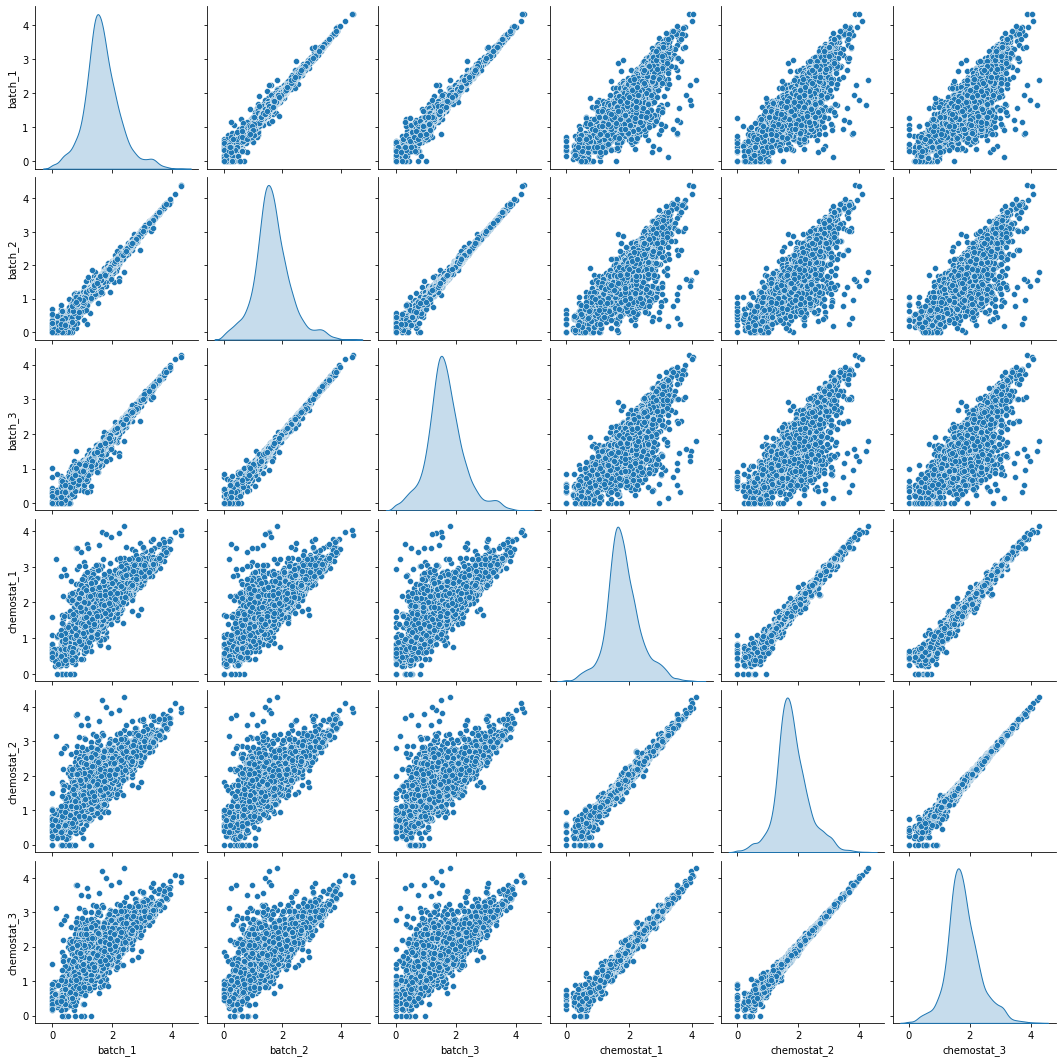

In [104]:
# 8-17 : カウントデータの 6 ライブラリ同時の関係を図示
sns.pairplot(log_tpm, diag_kind='kde')  # kde : kernel density estimation (カーネル密度推定)
plt.show()

### 8.3.4 線グラフ
- 順序のある系列データを可視化するために利用
- Axes クラスの `plot()` メソッドで描く

<ipython-input-105-7842d2becd1d>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


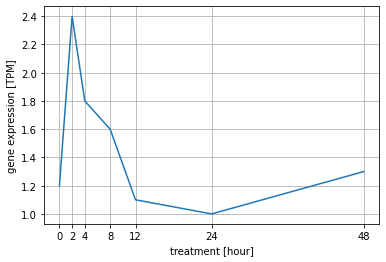

In [105]:
# 8-18 : ある遺伝子の発現量を処理前と処理後 48 時間まで観測した値を線グラフで描く
x = [0, 2, 4, 8, 12, 24, 48]
y = [1.2, 2.4, 1.8, 1.6, 1.1, 1.0, 1.3]

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(x, y)
ax.grid()
ax.set_xlabel('treatment [hour]')
ax.set_ylabel('gene expression [TPM]')
ax.set_xticks(x)
fig.show()

複数個の遺伝子発現量の変化を同じ作図領域に描くには、それぞれの遺伝子発現量に対して `plot()` メソッドを実行する
- グラフの線の色は自動的に配色される
- `plot()` 関数の `label` オプションに遺伝子名を追加して、グラフの線と実際の遺伝子名を対応させる
  - これにより `legend()` メソッドで凡例を表示させるときに、線の色と遺伝子名の対応が表示される

<ipython-input-106-d6127cb04f01>:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


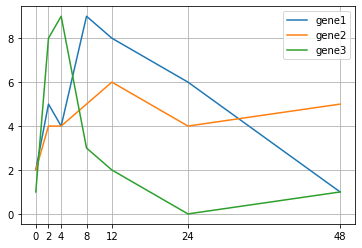

In [106]:
# 8-19 : 複数個の遺伝子発現量の変化を同じ作図領域に描く
x = [0, 2, 4, 8, 12, 24, 48]
y1 = [2, 5, 4, 9, 8, 6, 1]
y2 = [2, 4, 4, 5, 6, 4, 5]
y3 = [1, 8, 9, 3, 2, 0, 1]

fig = plt.figure()
ax = fig.add_subplot()
ax.grid()
ax.plot(x, y1, label='gene1')
ax.plot(x, y2, label='gene2')
ax.plot(x, y3, label='gene3')
ax.set_xticks(x)
ax.legend()
fig.show()

### 8.3.5 棒グラフ
- 複数のカテゴリに属している値同士の比較を行う際に用いられる
- Axes クラスの `bar()` メソッドで描く

<ipython-input-107-414c1430d466>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


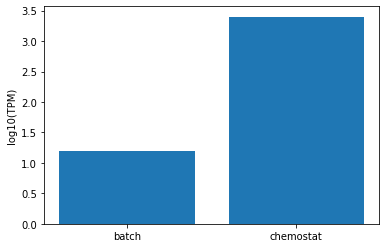

In [107]:
# 8-20 : 棒グラフを描く
x = ['batch', 'chemostat']
y = [1.2, 3.4]

fig = plt.figure()
ax = fig.add_subplot()
ax.bar(x, y)
ax.set_ylabel('log10(TPM)')
fig.show()

1 つのカテゴリに複数の値を含むデータを横並びの棒グラフで可視化するときには、横の幅や横軸の座標を調整する必要がある

<ipython-input-108-33ac9ca6474c>:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


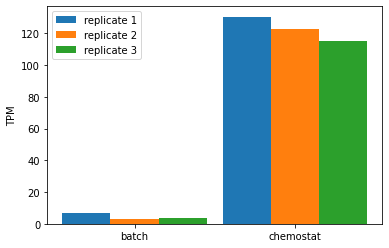

In [108]:
# 8-21 : 横並びの棒グラフを描く例
gene_id = 'gene_6356'
labels = ['batch', 'chemostat']
x = np.array([0, 1])
y = tpm.loc[gene_id, :].values.reshape((3, 2), order='F')  # FORTRAN 方式の変換順序（列方向から）

fig = plt.figure()
ax = fig.add_subplot()

# 棒の幅を 0.3 倍する
ax.bar(x, y[0, :], width=0.3, label='replicate 1')
# 1 本目の棒の x 座標に 0.3 (1 本目の棒の幅) 足した座標を、2 本目の棒の x 座標とする
ax.bar(x + 0.3, y[1, :], width=0.3, label='replicate 2')
# 1 本目の棒の x 座標に 0.3 + 0.3 (1 本目と 2 本目の棒の幅) 足した座標を、3 本目の棒の x 座標とする
ax.bar(x + 0.3 + 0.3, y[2, :], width=0.3, label='replicate 3')

ax.set_ylabel('TPM')
ax.set_xticks(x + 0.3)
ax.set_xticklabels(labels)
ax.legend()
fig.show()

積み上げ棒グラフの場合は、$x$ 軸の座標は調整せずに、棒を描く基準となる $y$ 軸の座標を調整する必要がある 

<ipython-input-109-cc6fed5c14c1>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


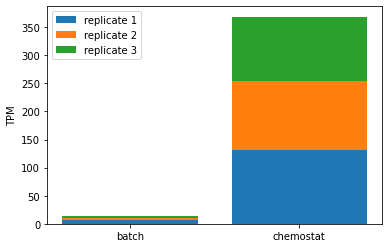

In [109]:
# 8-22 : 積み上げ棒グラフの例
gene_id = 'gene_6356'
x = ['batch', 'chemostat']
y = tpm.loc[gene_id, :].values.reshape((3, 2), order='F')

fig = plt.figure()
ax = fig.add_subplot()

ax.bar(x, y[0, :], label='replicate 1')
# 2 本目の棒の基準値 (bottom) を 1 本目の棒の高さにする
ax.bar(x, y[1, :], bottom=y[0, :], label='replicate 2')
# 3 本目の棒の基準値 (bottom) を 1 本目と 2 本目の棒の高さの和にする
ax.bar(x, y[2, :], bottom=y[0, :] + y[1, :], label='replicate 3')

ax.set_ylabel('TPM')
ax.legend()
fig.show()

<ipython-input-110-7c33338865c5>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


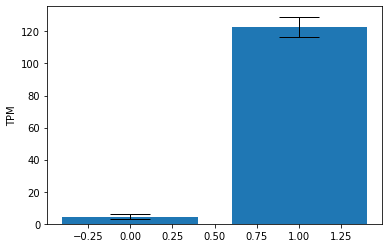

In [110]:
# 8-23 : batch 群と chemostat 群それぞれから平均と分散を計算し、エラーバーと棒グラフを同時に描く例
# 棒の高さが平均、エラーバーの高さが標準偏差
gene_id = 'gene_6356'
labels = ['batch', 'chemostat']
x = np.array([0, 1])
y = tpm.loc[gene_id, :].values.reshape((3, 2), order='F')
y_mean = y.mean(0)
y_sd = y.std(0)

error_bar_options = {'lw':1, 'capthick':1, 'capsize':20}  # lw ... line width

fig = plt.figure()
ax = fig.add_subplot()
ax.bar(x, y_mean, yerr=y_sd, error_kw = error_bar_options)
ax.set_ylabel('TPM')
fig.show()

### 8.3.6 ヒートマップ
- 遺伝子発現量行列を可視化するために用いられる
- Matplotlib で描くときには `pcolor()` メソッドを利用する
  - `colorbar()` メソッドを使うと横にスケールバーを表示させることも可能

<ipython-input-111-784d9275ab9f>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


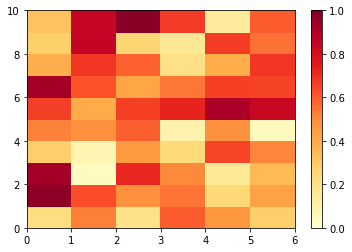

In [111]:
# 8-24 : 10 行 × 6 行からなる行列型のデータを作成し、ヒートマップで図示
x = np.random.rand(10, 6)  # ランダムの擬似データのため、出力のヒートマップは環境によって異なる

fig = plt.figure()
ax = fig.add_subplot()
heatmap = ax.pcolor(x, vmin=0, vmax=1, cmap='YlOrRd')  # Yellow → Orange → Red のグラデーション
fig.colorbar(heatmap, ax=ax)
fig.show()

batch および chemostat 間において、fold change の絶対値が 4 以上の遺伝子を発現変動遺伝子として定義し、発現変動遺伝子のヒートマップを描く

手順
1. fold change を計算し、発現変動遺伝子を検出して、発現変動遺伝子の発現量行列を取り出す
2. `pcolor()` メソッドに発現変動遺伝子の発現量行列を入れる
3. スケールバーの最小値を 0、最大値を発現変動遺伝子の発現量行列中の最大値とする

<ipython-input-112-e3fb9f42eebf>:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


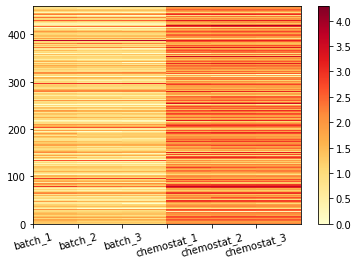

In [112]:
# 8-25 : 発現変動遺伝子のヒートマップを描く
batch_log_tpm_mean = np.log2(tpm.iloc[:, :3].mean(axis=1).values + 1)
chemostat_log_mean = np.log2(tpm.iloc[:, 3:].mean(axis=1).values + 1)

mu = (batch_log_tpm_mean + chemostat_log_mean) / 2
fc = chemostat_log_mean - batch_log_tpm_mean

is_DEG = np.array([False] * len(fc))
is_DEG[(np.abs(fc) > 2)] = True

log_tpm_DEG = log_tpm.loc[is_DEG, :].values
fc_DEG = fc[is_DEG]

fig = plt.figure()
ax = fig.add_subplot()
heatmap = ax.pcolor(log_tpm_DEG, vmin=0, vmax=np.max(log_tpm_DEG), cmap='YlOrRd')
ax.set_xticks([0, 1, 2, 3, 4, 5])
ax.set_xticklabels(log_tpm.columns.values, rotation=15)
fig.colorbar(heatmap, ax=ax)
fig.show()

Seaborn を使えば関数 1 つでクラスタリング付きのヒートマップを描画できる  
→ `clustermap()` メソッド

手順
1. ユークリッド距離で距離行列を計算
2. 距離行列に基づいてウォード法に基づくクラスタリングを行う
3. 結果をヒートマップに図示

<ipython-input-113-4c26f836045e>:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 144x1008 with 0 Axes>

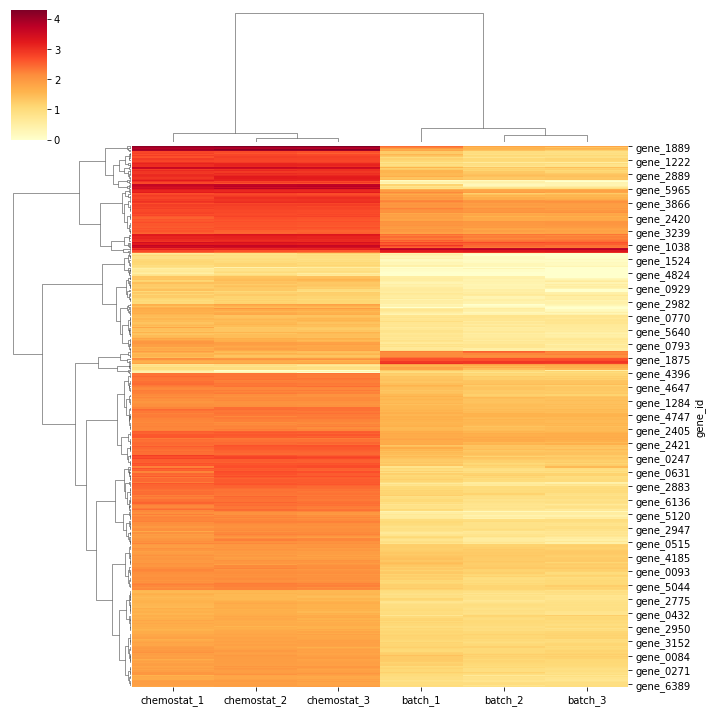

In [113]:
# 8-26 : クラスタリング付きヒートマップの描画
batch_log_tpm_mean = np.log2(tpm.iloc[:, :3].mean(axis=1).values + 1)
chemostat_log_mean = np.log2(tpm.iloc[:, 3:].mean(axis=1).values + 1)

mu = (batch_log_tpm_mean + chemostat_log_mean)
fc = chemostat_log_mean - batch_log_tpm_mean

is_DEG = np.array([False] * len(fc))
is_DEG[(np.abs(fc) > 2)] = True

log_tpm_DEG = log_tpm.loc[is_DEG, :]

fig = plt.figure(figsize=(2, 14))
sns.clustermap(log_tpm_DEG, method='ward', metric='euclidean', cmap='YlOrRd')
fig.show()

### 8.3.2 ベン図
- 複数のグループ間の共通要素を確認する際に用いられる
- `matplotlib_venn` ライブラリを用いる
   - 2 つのグループからなるベン図を描くときには `venn2()` 関数を用いる
   - このときグループ間のオーバーラップ領域に含まれる要素の数をあらかじめ計算する必要がある

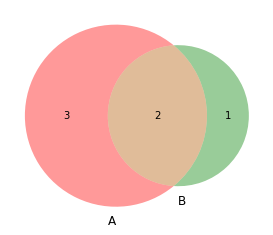

In [114]:
# 8-27 : ベン図の描画
from matplotlib_venn import venn2

group_a = {'gene_1', 'gene_2', 'gene_3', 'gene_4', 'gene_5'}  # グループは集合型
group_b = {'gene_4', 'gene_5', 'gene_6'}

n_a = len(group_a - group_b)
n_b = len(group_b - group_a)
n_ab = len(group_a & group_b)

v = venn2(subsets=(n_a, n_b, n_ab), set_labels=('A', 'B'))
plt.show()

3 つのグループからなるベン図を描く場合は `venn3()` 関数を利用する

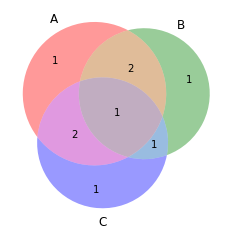

In [115]:
# 8-28 : 3 つのグループのベン図
from matplotlib_venn import venn3

group_a = {'gene_1', 'gene_2', 'gene_3', 'gene_4', 'gene_5', 'gene_6'}  
group_b = {'gene_2', 'gene_4', 'gene_6', 'gene_8', 'gene_10'}
group_c = {'gene_2', 'gene_3', 'gene_5', 'gene_7', 'gene_9', 'gene_10'}

n_a = len(group_a - group_b - group_c)
n_b = len(group_b - group_a - group_c)
n_c = len(group_b - group_a - group_c)
n_ab = len((group_a & group_b)- group_c)
n_bc = len((group_b & group_c)- group_a)
n_ca = len((group_c & group_a)- group_b)
n_abc = len(group_a & group_b & group_c)

v = venn3(subsets=(n_a, n_b, n_ab, n_c, n_ca, n_bc, n_abc), set_labels=('A', 'B', 'C'))
plt.show()

## 8.4 プロット領域の分割
### 8.4.1 複数グラフ

`fig.add_subplot()` 関数に引数（3 つの整数値）を与えることで、複数の Axes クラスのインスタンスを生成できる
- `fig.add_subplot('行の分割数', '列の分割数', '分割後の領域番号')`
  - `ax1 = fig.add_subplot(2, 1, 1)` : プロット領域が 2 行 × 1 行に分割されて、その 1 番目の領域
- `plt.tight_layout()` メソッドでグラフ同士の隙間を調整し、見やすくする

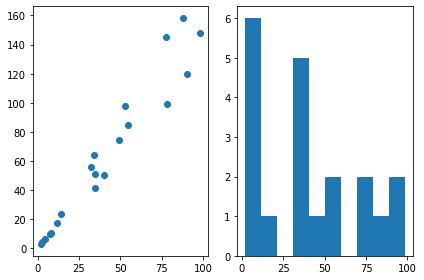

In [116]:
# 8-29 : 複数グラフのプロット

# ランダムの擬似データを作成
x = np.random.uniform(0, 100, 20)  # 0 から 100 の間から乱数を 20 個
y = x * np.random.uniform(1, 2, 20)

fig = plt.figure()

## Axis 1
ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(x, y)

## Axis 2
ax2 = fig.add_subplot(1, 2, 2)
ax2.hist(x)

# show plots
plt.tight_layout()
plt.show()

`add_subplot()` はプロット領域の縦横の等分割のみ可能
- `add_subplot(2, 3, 1)` の場合はプロット領域を 2 行 × 3 列に等分割
- 作図領域の番号は左上から始まり、横方向に進んでいく
  - 横方向に行けなくなったら下へ

非等分割の場合には `gridspec.GridSpec()` メソッドを用いる
- プロット領域をグリッド状に等分割し、そのグリッドを結合させて作図領域を作る
  - 1 行目の 1 列目と 2 列目の 2 つのグリッドを結合させるには、`[0, 0:2]` と指定する
  
<img src="8-4-1.jpeg" width=600>

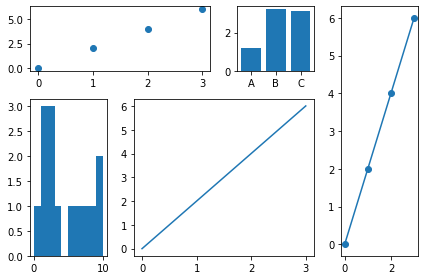

In [117]:
# 8-30 : 非等分割な作図領域分割
import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(3, 4)

ax1 = plt.subplot(gs[0, 0:2])
ax2 = plt.subplot(gs[0, 2])
ax3 = plt.subplot(gs[1:3, 0])
ax4 = plt.subplot(gs[1:3, 1:3])
ax5 = plt.subplot(gs[0:3, 3])

ax1.scatter([0, 1, 2, 3], [0, 2, 4, 6])
ax3.hist([0, 1, 1, 2, 2, 3, 1, 2, 5, 6, 7, 8 ,9, 10])
ax2.bar(['A', 'B', 'C'], [1.2, 3.2, 3.1])
ax4.plot([0, 1, 2, 3], [0, 2, 4, 6])
ax5.plot([0, 1, 2, 3], [0, 2, 4, 6], marker='o')

plt.tight_layout()
plt.show()